In [1]:
from common_imports import *
from intrinsic_eval import _ws353, _ws353_random_human

/home/m/mm/mmb28/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def read_ws353(file_num):
    df = pd.read_csv('similarity-data/wordsim353/set%d.csv' % file_num)

    cols = [x for x in df.columns]
    cols[:3] = ['w1', 'w2', 'sim']
    df.columns = cols
    df.w1 = df.w1.map(str.lower)
    df.w2 = df.w2.map(str.lower)
    return df

df = pd.concat([read_ws353(1), read_ws353(2)])

In [3]:
df.head()

,1,10,11,12,13,14,15,16,2,3,4,5,6,7,8,9,sim,w1,w2
0,9.0,2.0,6.0,7,8,NaN,NaN,NaN,6.0,8.0,8,7,8,8.0,4,7.0,6.77,love,sex
1,9.0,9.0,7.0,5,7,NaN,NaN,NaN,7.0,8.0,7,8,9,8.5,5,6.0,7.35,tiger,cat
2,10.0,10.0,10.0,10,10,NaN,NaN,NaN,10.0,10.0,10,10,10,10.0,10,10.0,10.00,tiger,tiger
3,8.0,8.0,9.0,4,9,NaN,NaN,NaN,8.0,7.0,7,8,9,7.0,6,7.0,7.46,book,paper
4,8.0,8.0,10.0,3,9,NaN,NaN,NaN,7.0,9.0,9,8,8,7.0,7,6.0,7.62,computer,keyboard


In [4]:
df1 = df.pivot_table(columns='w1 w2 sim'.split(), values=[str(x) for x in range(1, 17)])
df1 = df1.reset_index().drop('level_0', axis=1)
df1.columns = 'w1 w2 meansim sim'.split()
df1 = df1.dropna()
df1['simbin'] = df1.meansim.apply(round)
# df1.to_csv('test.csv', na_rep='---')
df1.head()

,w1,w2,meansim,sim,simbin
0,admission,ticket,7.69,8.0,8.0
1,alcohol,chemistry,5.54,8.0,6.0
2,aluminum,metal,7.83,9.0,8.0
3,announcement,effort,2.75,5.0,3.0
4,announcement,news,7.56,8.0,8.0


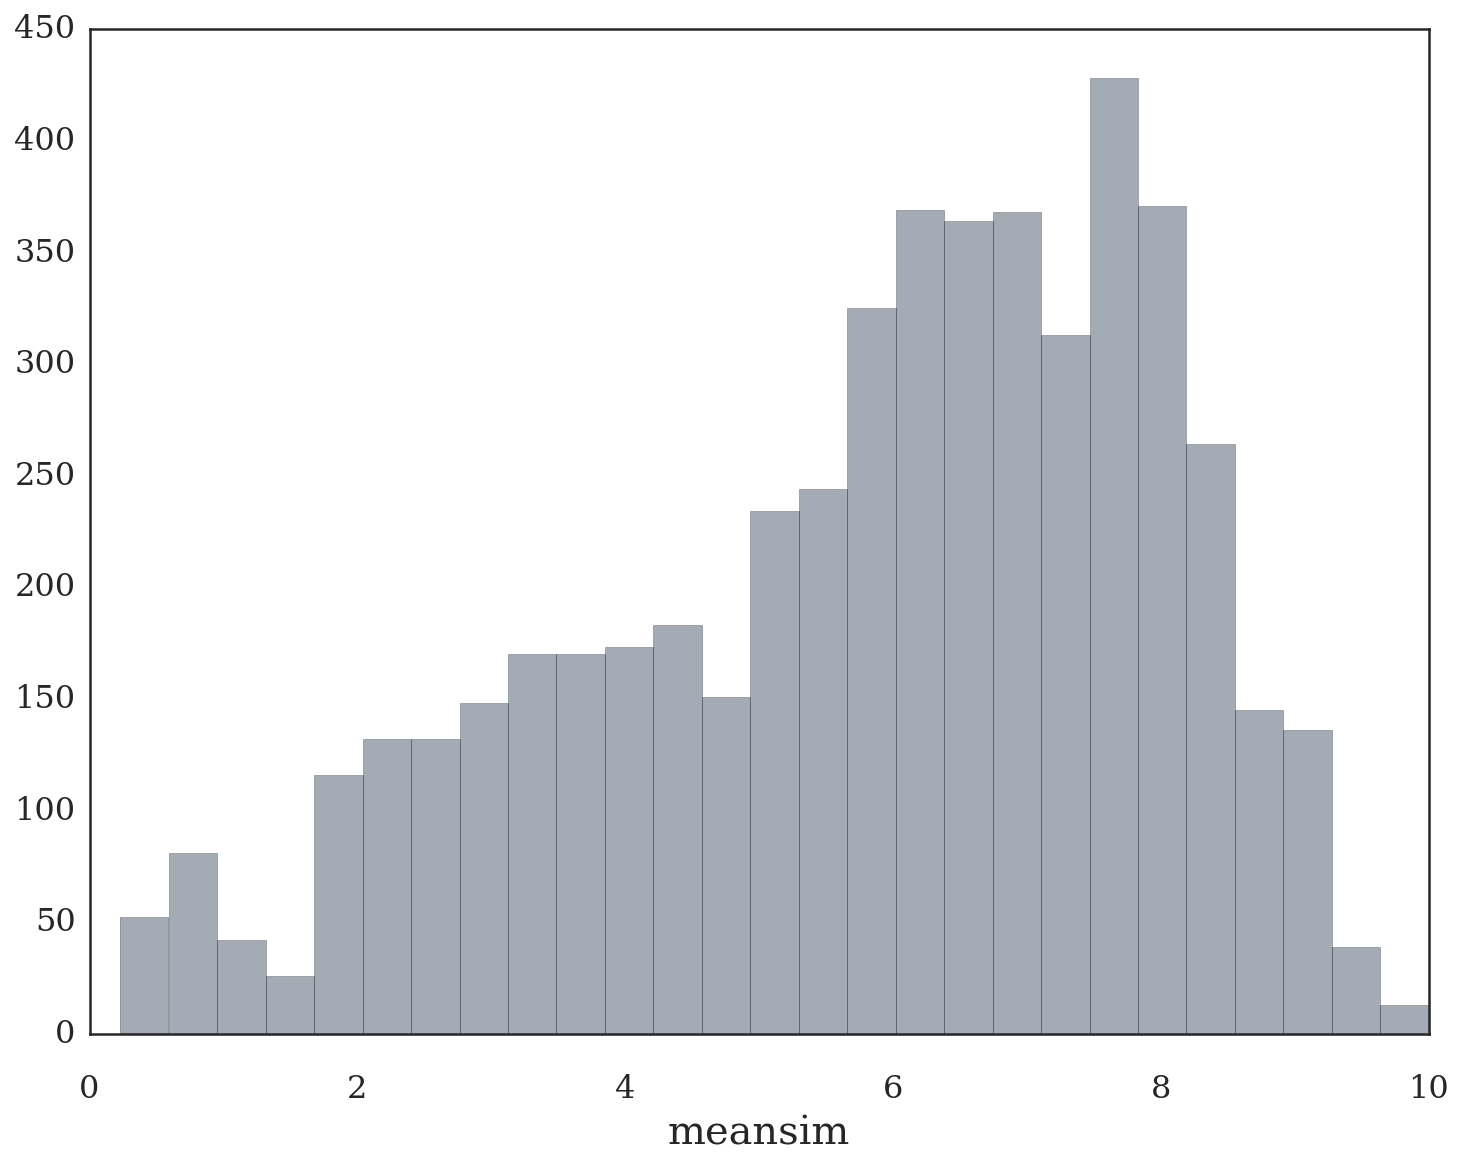

In [5]:
ax = sns.distplot(df1.meansim, kde=False);

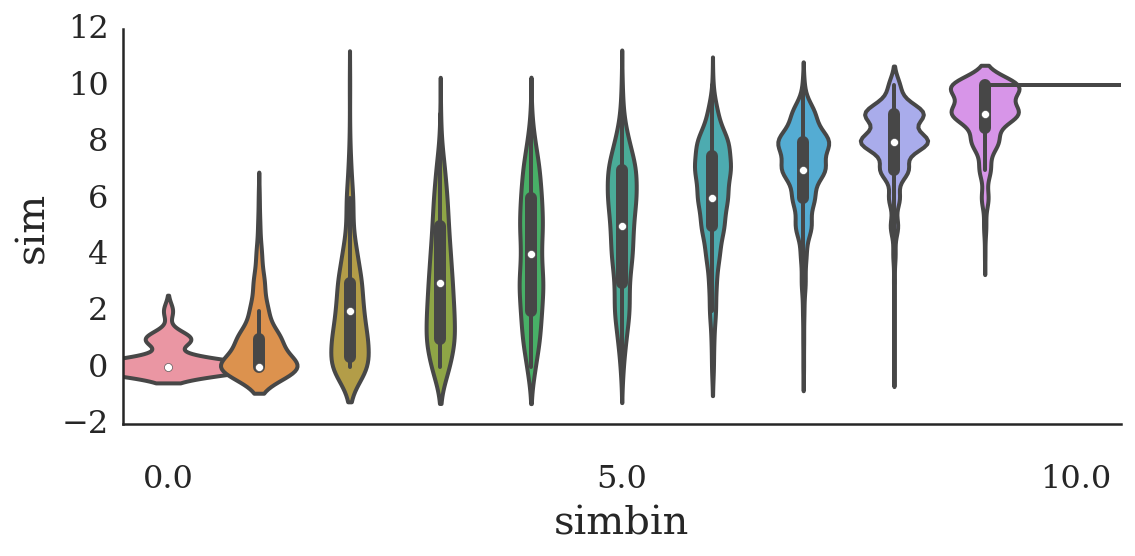

In [6]:
ax = sns.factorplot(data=df1, x='simbin', y='sim', kind='violin', aspect=2, width=2);
sparsify_axis_labels_old(ax.axes.flat[0], 5)

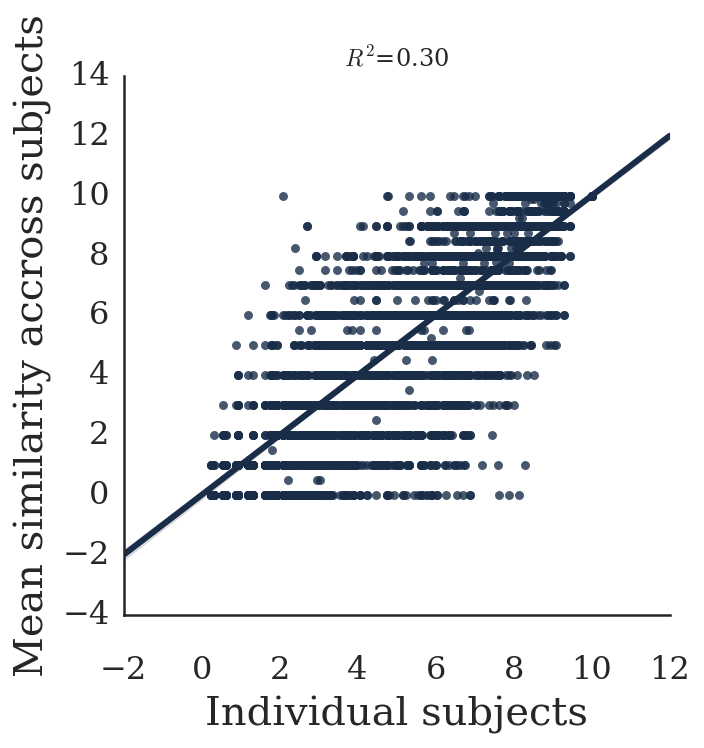

In [7]:
sns.lmplot('meansim', 'sim', df1)
plt.ylabel('Mean similarity accross subjects')
plt.xlabel('Individual subjects');

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X, y = df1.meansim.values[:, np.newaxis], df1.sim.values
lr = LinearRegression().fit(X, y)
plt.title('$R^2$=%1.2f'%r2_score(lr.predict(X), y));

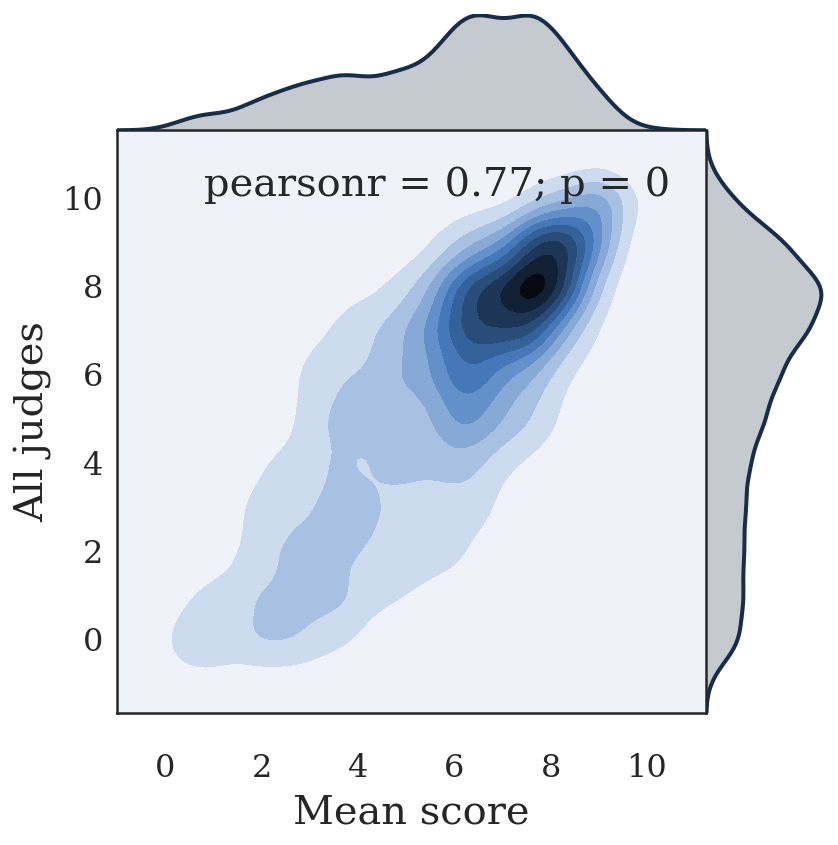

In [12]:
from scipy.stats import pearsonr
sns.jointplot(x='meansim', y='sim', data=df1, kind='kde', space=0).set_axis_labels('Mean score', 'All judges')
plt.savefig('jointplot-ws353.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1);

In [17]:
# difference can reach 7 points, and 10% of all data is more than 2 points aways
pd.cut((df1.sim - df1.meansim).abs(), np.arange(8)).value_counts().cumsum()
# plt.hist(df1.sim - df1.meansim)

(0, 1]    2337
(1, 2]    3893
(2, 3]    4654
(3, 4]    4961
(4, 5]    5081
(5, 6]    5111
(6, 7]    5122
dtype: int64

In [18]:
df1.shape

(5189, 5)

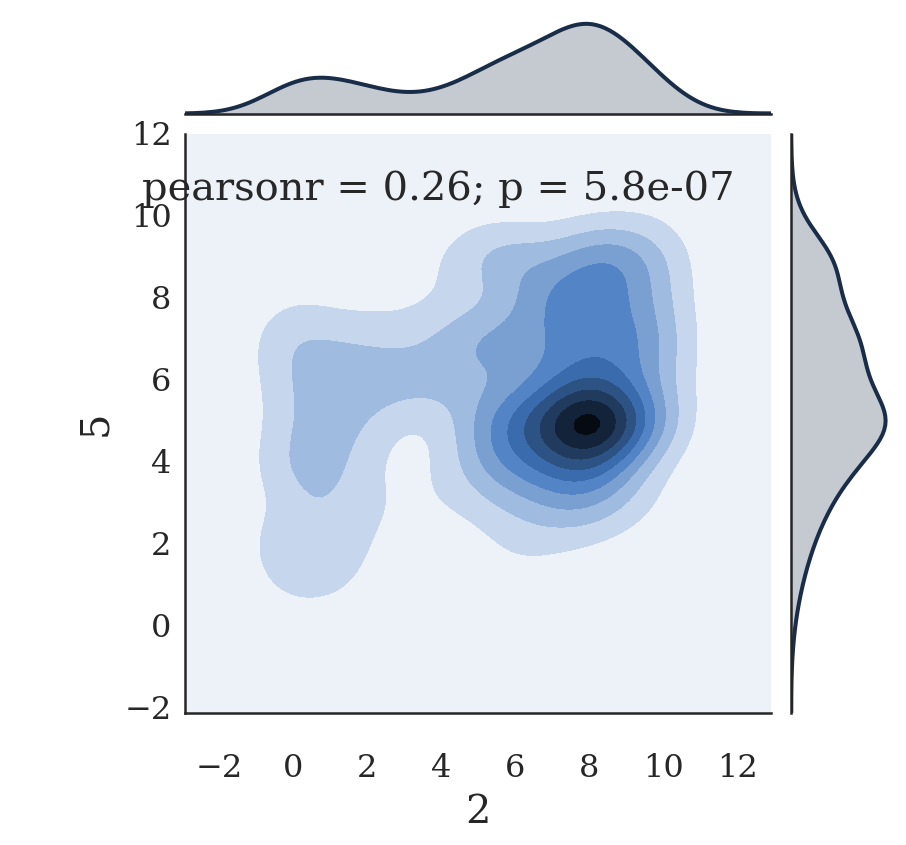

In [21]:
df.head()
sns.jointplot(x='2', y='5', data=df, kind='kde');